https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

from sklearn.model_selection import train_test_split

## 读取数据

1) csv 数据读取格式：

pd.read_csv("xxx.csv")

pd.read_csv("xxx.csv", encoding='gb18030')

pd.read_csv("xxx.csv", encoding='utf-8')

如有需要，添加参数 engine='python'

2) xlsx读取格式：

pd.read_excel("xxx.xlsx")

In [2]:
df = pd.read_excel('电信客户流失.xlsx')
df.head()

,地区,用时,年龄,婚姻,住址,收入,学历,工龄,退休,性别,...,三方通话,手机支付,长途日志,免费服务日志,设备日志,电话卡日志,无线日志,收入日志,类型,流失
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


## 二分类情况

### 建模预测y_test

In [3]:
X = df[['地区', '用时', '年龄', '婚姻', '住址', '收入', '学历', '工龄', '退休', '性别']]
y = df[['流失']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [5]:
from sklearn.naive_bayes import GaussianNB

# 以朴素贝叶斯分类器为例子
clf = GaussianNB()
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 画roc曲线
只需要输入真实标签 y_test,预测值y_score

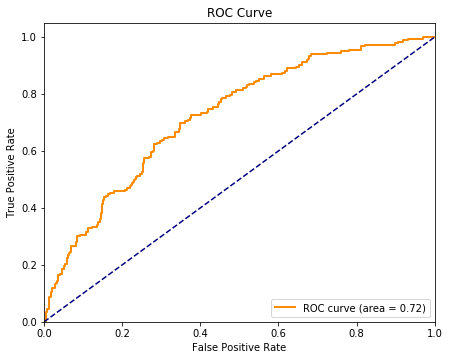

阈值为：0.3513(坐标0.3482, 0.6995)


In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr) 

##确定最佳阈值
right_index = (tpr + (1 - fpr) - 1)
yuzhi = max(right_index)
index = list(right_index).index(yuzhi) 
tpr_val = tpr[index]
fpr_val = fpr[index]
## 绘制roc曲线图
plt.subplots(figsize=(7, 5.5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
# plt.scatter(fpr_val, tpr_val) # 把阈值点显示出来
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print('阈值为：%.4f(坐标%.4f, %.4f)'%(yuzhi, fpr_val, tpr_val))

## 多分类情况

### 建模预测

只需修改label_binarize(y, classes=[1, 2, 3, 4]) 中的classes，以及对应的分类器clf。得到的y_score将和y_test去计算roc曲线

In [7]:
X = df[['地区', '用时', '年龄', '婚姻', '住址', '收入', '学历', '工龄', '退休', '性别']]
y = df[['类型']]

In [8]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[1, 2, 3, 4]) 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [10]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=123))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

### 绘制roc曲线

只需要输入真实标签 y_test,预测值y_score

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


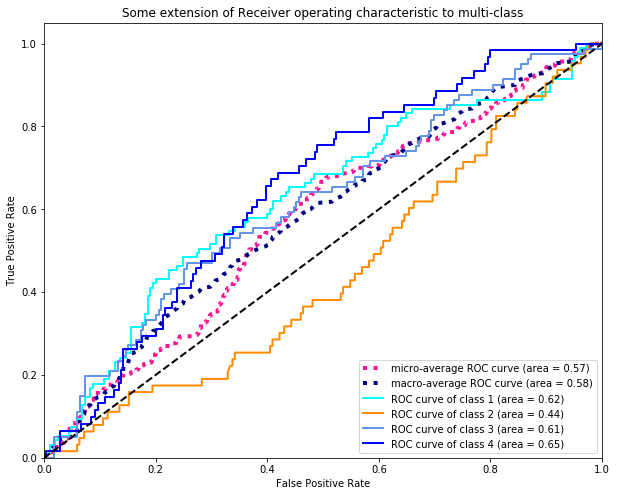

In [11]:
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.subplots(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green', 'pink', 'red']) # 多给几个颜色以防更多分类情况
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()